In [1]:
# PIPELINE COMPLETO DE DATOS

# Este notebook ejecuta automáticamente todas las etapas:
#   1. BRONZE: limpia y transforma los datos iniciales.
#   2. SILVER: prepara los datos para análisis.
#   3. GOLD : combina con datos adicionales (edad/dosis)
#                y genera la versión final.
#
# Los archivos iniciales (CSV) deben estar en:
#   DATOS/1CRUDO/


In [2]:
import os
from datetime import datetime

# Creamos una función sencilla para mostrar la hora de ejecución
def mostrar_tiempo(etapa):
    ahora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{ahora}] Ejecutando etapa: {etapa}")

# Comprobamos que las rutas necesarias existen
for carpeta in ["DATOS/1CRUDO", "DATOS/2BRONZE", "DATOS/3SILVER", "DATOS/4GOLD", "PROGRAMACIÓN"]:
    if not os.path.exists(carpeta):#Comprueba si la carpeta ya existe en tu sistema de archivos
        os.makedirs(carpeta)#Crea la carpeta (ya esta hecho dentro de los .py pero por si acaso)

print("Entorno preparado correctamente ")



Entorno preparado correctamente 


In [3]:
# ETAPA 1: BRONZE

# - Usa el primer CSV de 1CRUDO
# - Limpia, transforma y guarda un nuevo archivo en 2BRONZE


mostrar_tiempo("BRONZE")

%run PROGRAMACIÓN/1bronze.py

print("BRONZE completado correctamente.")


[2025-11-14 20:38:21] Ejecutando etapa: BRONZE
Datos : (300, 10)
Filas antes de eliminar nulos: PatientID        299
ExamDate         299
KermaAir_mGy     300
kVp              299
Thickness_cm     298
Glandular_pct    299
AnodeFilter      299
mAs              299
Compression_N    299
Projection       299
dtype: int64
Filas despues de eliminar nulos: PatientID        299
ExamDate         299
KermaAir_mGy     300
kVp              299
Thickness_cm     298
Glandular_pct    299
AnodeFilter      299
mAs              299
Compression_N    299
Projection       299
dtype: int64
Datos tras limpieza (silver): (299, 10)
  PatientID    ExamDate  KermaAir_mGy   kVp  Thickness_cm  Glandular_pct  \
0    P10000  24/01/2024         8.308  31.8          6.32           22.4   
1    P10001  22/11/2024         1.348  31.7          6.75           69.9   
2    P10002  12/08/2024         5.832  26.9          3.93           32.6   
3    P10003  07/01/2025         4.882  28.8          2.10           28.9   
4    

[2025-11-14 20:38:22] Ejecutando etapa: SILVER
Columnas encontradas en el archivo:
['PatientID', 'ExamDate', 'KermaAir_mGy', 'kVp', 'Thickness_cm', 'Glandular_pct', 'AnodeFilter', 'mAs', 'Compression_N', 'Projection']


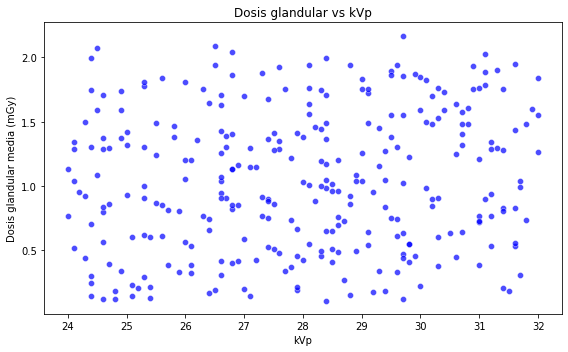

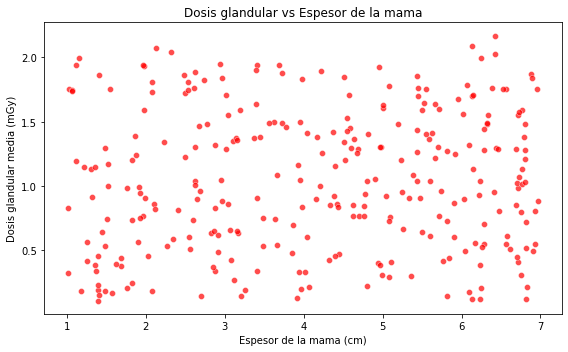

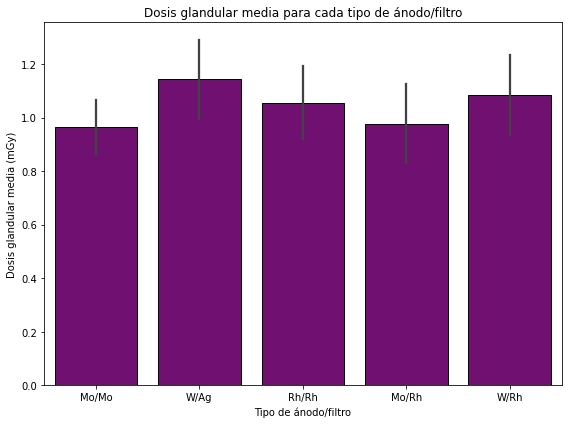

Correlación de Pearson entre variables numéricas:
                   kVp  Thickness_cm  KermaAir_mGy    Dg_mGy
kVp           1.000000      0.103756      0.098672  0.130213
Thickness_cm  0.103756      1.000000      0.081222  0.071001
KermaAir_mGy  0.098672      0.081222      1.000000  0.976893
Dg_mGy        0.130213      0.071001      0.976893  1.000000


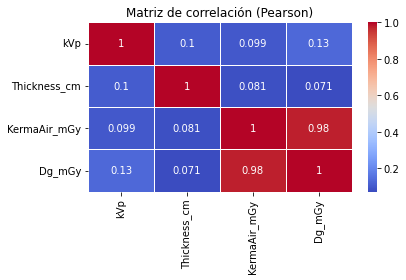

Cálculo completado
Archivo calculado generado: DATOS/3SILVER\mammo_output__dance.csv
Dosis glandular media promedio: 1.046 mGy
SILVER completado correctamente.


In [4]:
# ETAPA 2: SILVER

# - Usa el archivo generado en 2BRONZE
# - Aplica transformaciones adicionales
# - Guarda la salida en 3SILVER

mostrar_tiempo("SILVER")

%run PROGRAMACIÓN/2silver.py

print("SILVER completado correctamente.")


[2025-11-14 20:38:23] Ejecutando etapa: GOLD


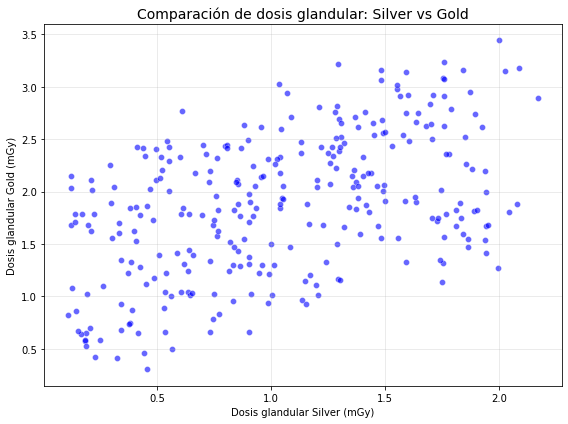

Correlación de Pearson entre Silver y Gold:
                  Dosis_Silver_mGy  Dosis_Gold_mGy
Dosis_Silver_mGy           1.00000         0.49179
Dosis_Gold_mGy             0.49179         1.00000


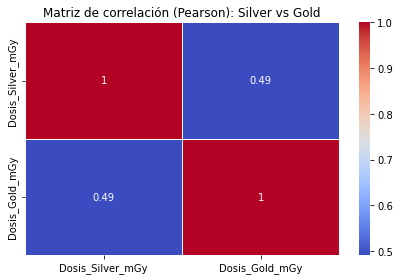

Cálculo completado
Archivo calculado generado: DATOS/4GOLD\mammocalculadoteorico.csv
GOLD completado correctamente.


In [5]:
# ETAPA 3: GOLD

# - Usa los datos de 3SILVER
# - Combina con el segundo CSV de 1CRUDO (dosis y edad)
# - Genera la tabla final en 4GOLD


mostrar_tiempo("GOLD")

%run PROGRAMACIÓN/3gold.py

print("GOLD completado correctamente.")


In [6]:
print("PIPELINE EJECUTADO CON ÉXITO")
print("Los resultados finales están disponibles en:")
print("DATOS/4GOLD")



PIPELINE EJECUTADO CON ÉXITO
Los resultados finales están disponibles en:
DATOS/4GOLD
